In [84]:
import matlab.engine
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import pickle
# there were a lot of deprecation warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
cd "/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/NET/timeSeriesViewer/dataRecordingObjects/"

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/NET/timeSeriesViewer/dataRecordingObjects


In [3]:
# stat the matlab engine & get data into python object
eng = matlab.engine.start_matlab() #the engine is set to the current path
bin_fullpath = r'/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Data/experiment1_109.raw.bin' #NOTE: meta file shoud be with the bin file at the same folder
bin_obj = eng.binaryRecording(bin_fullpath) #NOTE- if fail - make sure you created eng in the rigיt path

In [77]:
time_start_hours = 14
time_start_ms = time_start_hours * 60.0 * 60 * 1000
startTime_ms = matlab.double([time_start_ms]) #crate a matlab array (numbers should be doubles)
channels = matlab.double(range(1,2))
time_window_hours = 1
time_window_ms = time_window_hours * 60.0 * 60 * 1000
matlab_mat_data = eng.getData(bin_obj, channels, startTime_ms, time_window_ms)
py_mat = np.array(matlab_mat_data) #convert the result to python object

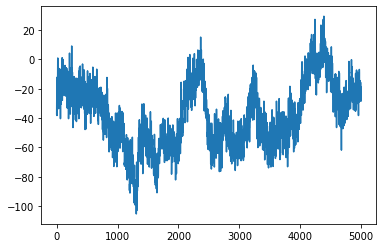

In [78]:
# plot data
pc_pymat = py_mat[0][0]
plt.plot(pc_pymat[15000:20000])

In [ ]:
pc_pymat.shape

In [ ]:
# plot data new way - only differance is in the graph's shape (?)
plt.figure(figsize=(20,5))
plt.plot(pc_pymat[10000:30000])

In [79]:
# furier transform
# s_pymat = pc_pymat[:72000000]
s_pymat = pc_pymat
#f, t, Zxx = signal.stft(x, fs, nperseg=1000)
# x = the signal (vector of samples) ; fs = sample rate ; nperseg = window (num of samples)
frequencies, segment_times, freq_magnitudes = signal.stft(s_pymat, 20000, nperseg=200000, noverlap = 180000)

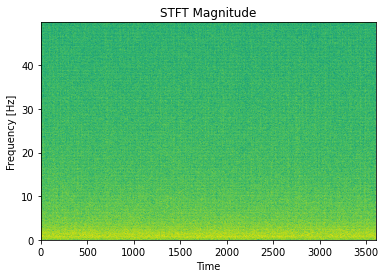

In [73]:
# segmentation and plot
plt.pcolormesh(segment_times[:], frequencies[:500], np.log(np.abs(freq_magnitudes[:500,:])), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')
plt.show()

In [ ]:
low_freq_magnitudes.max()

In [80]:
low_freq_magnitudes = np.abs(freq_magnitudes[:500,:]).transpose() #upto 50Hz, transposed!
# low_freq_magnitudes.shape

In [63]:
num_freq = low_freq_magnitudes.shape[0]
for_check_plus50 = low_freq_magnitudes[:round(num_freq / 2),:] + 0.3
new = np.concatenate((for_check_plus50,low_freq_magnitudes[round(num_freq / 2):,:]),axis=0)
new.shape

(3601, 500)

In [ ]:
print(len(segment_times[:]))
print(len(frequencies[:500]))
print(len(np.log(new[:,:500])))
print(len(np.log(new[:,:500][0])))

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


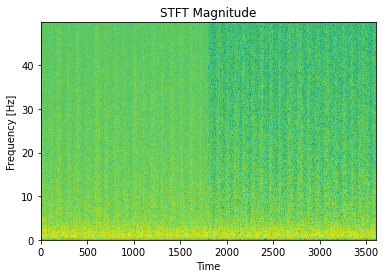

In [64]:
# segmentation and plot
plt.pcolormesh(segment_times[:], frequencies[:500], np.log(new[:,:500].transpose()))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')
plt.show()

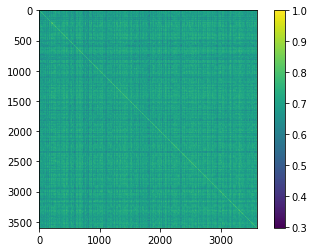

In [81]:
# compute correlation matrix of frequencies magnitudes
corr_mat = np.corrcoef(low_freq_magnitudes) #by pearson
# corr_mat = np.corrcoef(new) #by pearson
# corr_mat = np.corrcoef(new.transpose()) #by pearson
corr_mat.shape
plt.imshow(corr_mat)
# plt.pcolormesh(segment_times[:], segment_times[:], corr_mat, vmin=-1, vmax=1)
# plt.pcolormesh(frequencies[:500], frequencies[:500], corr_mat, vmin=-1, vmax=1)

plt.colorbar()


In [56]:
print(corr_mat[0][20])
print(corr_mat[400][420])
one = np.array([0.5 for i in range(3601)])
zero = np.array([-0.5 for i in range(3601)])
corr_mat[0].shape
scipy.stats.pearsonr(one,zero)

0.6628622880308552
0.6913729445173719


(nan, nan)

In [68]:
# cluster with ward (2 clusters)
from sklearn.cluster import AgglomerativeClustering

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

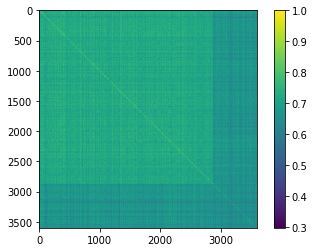

In [82]:
# re-organize the segments according to clusters
ward_clusters = AgglomerativeClustering().fit(corr_mat)
indices = np.argsort(ward_clusters.labels_)
magnitudes_by_clusters = low_freq_magnitudes[indices]
corr_mat_by_clusters = np.corrcoef(magnitudes_by_clusters)
corr_mat_by_clusters.shape
plt.imshow(corr_mat_by_clusters)
plt.colorbar()

In [ ]:
corr_mat_by_clusters = corr_mat[indices]
corr_mat_by_clusters.shape
plt.imshow(corr_mat_by_clusters)

In [ ]:
plt.imshow(corr_mat_by_clusters)
plt.colorbar()

In [ ]:
#divide to two by correlation
cls1 = []
cls2 = []
for i in range(len(corr_mat)):
    for j in range(i+1, len(corr_mat)):
        if corr_mat[i][j] > 0.5:
            cls1.append(low_freq_magnitudes[i])
            cls1.append(low_freq_magnitudes[j])
        else:
            cls2.append(low_freq_magnitudes[i])
            cls2.append(low_freq_magnitudes[j]) 
cls1 = np.array(cls1)
cls2 = np.array(cls2)

In [ ]:
#trying with more than 2 clusters with ward:
# ward_clusters = AgglomerativeClustering(n_clusters = 4).fit(corr_mat)
# indices = np.argsort(ward_clusters.labels_)
# magnitudes_by_clusters = low_freq_magnitudes[indices]
# corr_mat_by_clusters = np.corrcoef(magnitudes_by_clusters)
# corr_mat_by_clusters.shape
# plt.imshow(corr_mat_by_clusters)

In [ ]:
lables = ward_clusters.labels_
indxes_cls1 = np.where(lables == 0)[0]
indxes_cls2 = np.where(lables == 1)[0]
cls1 = low_freq_magnitudes[indxes_cls1, :500]
cls2 = low_freq_magnitudes[indxes_cls2, :500]

In [ ]:
indxes_cls1

In [ ]:
#cal the freqs
def avrg_freq_per_cluster(cls_group):
    cls_len = cls_group.shape[0]
    relevant_freqs = cls_group.shape[1]
    cls_freqs = [0]*relevant_freqs
    for vec in cls_group:
        for i in range(relevant_freqs):
            cls_freqs[i] += vec[i]

    cls_freqs =  np.divide(cls_freqs,cls_len)
    return cls_freqs

In [ ]:
def show_graph(cls1_freqs, cls2_freqs):
    plt.plot(frequencies[:500],cls1_freqs)
    plt.plot(frequencies[:500],cls2_freqs)
    plt.show()

In [ ]:
show_graph(avrg_freq_per_cluster(cls1), avrg_freq_per_cluster(cls2))

In [ ]:
show_graph(cls1[:2000], cls2[:2000])